In [8]:
import pandas as pd
import numpy as np

seed_value = 1789

np.random.seed(seed_value)
tf.random.set_seed(seed_value)
tf.keras.utils.set_random_seed(seed_value)

data    = pd.read_csv("./preproc/04b_encoded_bike.csv", header = None).to_numpy()

bd_data = pd.read_csv("./preproc/04b_encoded_bike_bidimensional.csv", header = None).to_numpy()

read = 11
pred = 12 - read

assert pred > 0

X = np.concatenate((bd_data[:,:read], bd_data[:,12:12+read]), axis = 1)
Y = np.concatenate((bd_data[:,read: 12], bd_data[:,12+read:24]), axis = 1)

In [9]:
X[:10]

array([[ 5.43859649,  5.43859649,  5.43859649,  5.0877193 ,  4.73684211,
         4.73684211,  4.38596491,  4.03508772,  4.03508772,  3.68421053,
         3.33333333, -4.        , -4.5       , -4.        , -4.        ,
        -4.        , -3.5       , -3.5       , -3.5       , -3.        ,
        -3.        , -3.        ],
       [ 5.0877193 ,  4.73684211,  4.73684211,  4.38596491,  4.03508772,
         4.03508772,  3.68421053,  3.33333333,  2.98245614,  2.63157895,
         2.63157895, -4.        , -4.        , -3.5       , -3.5       ,
        -3.5       , -3.        , -3.        , -3.        , -3.        ,
        -3.        , -2.5       ],
       [ 4.38596491,  4.03508772,  4.03508772,  3.68421053,  3.33333333,
         2.98245614,  2.63157895,  2.63157895,  2.28070175,  2.28070175,
         1.92982456, -3.5       , -3.5       , -3.        , -3.        ,
        -3.        , -3.        , -3.        , -2.5       , -2.5       ,
        -2.        , -2.        ],
       [ 3.68421053

In [10]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

model = keras.Sequential()
model.add(layers.Dense(256, kernel_initializer='glorot_normal', input_shape=(2*read,),activation='relu'))
model.add(layers.Dense(128, kernel_initializer='glorot_normal', activation='relu'))
#model.add(layers.Dense(64, kernel_initializer='glorot_normal', activation='relu'))
#model.add(layers.Dense(32, kernel_initializer='glorot_normal',activation='relu'))
#model.add(layers.Dense(16, kernel_initializer='glorot_normal',activation='relu'))
model.add(layers.Dense(2*pred))#, activation='sigmoid')

loss_function = 'mae'
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss=loss_function, optimizer=adam,metrics=['mse'])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               5888      
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 2)                 258       
                                                                 
Total params: 39,042
Trainable params: 39,042
Non-trainable params: 0
_________________________________________________________________


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.70)

In [13]:
history = model.fit(X_train, Y_train, epochs= 100,batch_size=100, validation_data=(X_test, Y_test))

Epoch 1/100
359/359 [==============================] - 1s 2ms/step - loss: 0.3073 - mse: 0.2549 - val_loss: 0.2497 - val_mse: 0.0985
Epoch 2/100
359/359 [==============================] - 1s 2ms/step - loss: 0.2253 - mse: 0.0832 - val_loss: 0.2428 - val_mse: 0.0939
Epoch 3/100
359/359 [==============================] - 1s 2ms/step - loss: 0.2214 - mse: 0.0807 - val_loss: 0.2164 - val_mse: 0.0764
Epoch 4/100
359/359 [==============================] - 1s 2ms/step - loss: 0.2166 - mse: 0.0779 - val_loss: 0.2150 - val_mse: 0.0755
Epoch 5/100
359/359 [==============================] - 1s 2ms/step - loss: 0.2130 - mse: 0.0759 - val_loss: 0.2128 - val_mse: 0.0735
Epoch 6/100
359/359 [==============================] - 1s 2ms/step - loss: 0.2113 - mse: 0.0744 - val_loss: 0.2124 - val_mse: 0.0752
Epoch 7/100
359/359 [==============================] - 1s 2ms/step - loss: 0.2116 - mse: 0.0748 - val_loss: 0.2293 - val_mse: 0.0875
Epoch 8/100
359/359 [==============================] - 1s 2ms/step - 

359/359 [==============================] - 1s 2ms/step - loss: 0.1798 - mse: 0.0604 - val_loss: 0.1951 - val_mse: 0.0664
Epoch 63/100
359/359 [==============================] - 1s 2ms/step - loss: 0.1812 - mse: 0.0610 - val_loss: 0.1939 - val_mse: 0.0680
Epoch 64/100
359/359 [==============================] - 1s 2ms/step - loss: 0.1804 - mse: 0.0606 - val_loss: 0.1846 - val_mse: 0.0633
Epoch 65/100
359/359 [==============================] - 1s 2ms/step - loss: 0.1816 - mse: 0.0614 - val_loss: 0.1931 - val_mse: 0.0686
Epoch 66/100
359/359 [==============================] - 1s 2ms/step - loss: 0.1797 - mse: 0.0602 - val_loss: 0.1886 - val_mse: 0.0649
Epoch 67/100
359/359 [==============================] - 1s 2ms/step - loss: 0.1791 - mse: 0.0602 - val_loss: 0.1936 - val_mse: 0.0678
Epoch 68/100
359/359 [==============================] - 1s 2ms/step - loss: 0.1788 - mse: 0.0600 - val_loss: 0.1860 - val_mse: 0.0631
Epoch 69/100
359/359 [==============================] - 1s 2ms/step - loss:

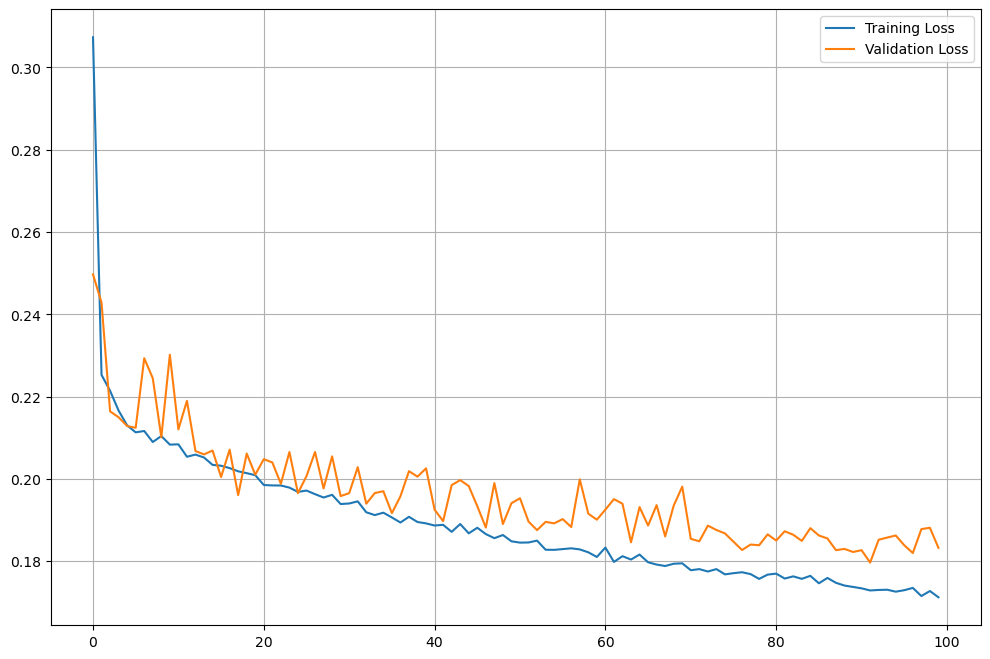

In [14]:
import matplotlib.pyplot as plt

f, a = plt.subplots(figsize=(12,8))

a.plot(history.history['loss'], label = "Training Loss")
a.plot(history.history['val_loss'], label = "Validation Loss")
plt.legend()
plt.grid(True)

In [15]:
p_xy = model.predict(X_test)


480/480 [==============================] - 0s 651us/step


In [16]:
t_xy = Y_test
t_xy[0].reshape(2,-1).T

array([[2.63157895, 1.        ]])

In [17]:
def to_ij(arr):
    prepared = arr.reshape(2,-1).T /10
    res = np.array([])
    for it in prepared:
        res = np.append(res, np.round([57/2*(1+it[0]), -20*(it[1]-1) ]))
    return res
p_ijs = np.array([to_ij(p) for p in p_xy])
p_ijs

#recoded_X_test = np.array([to_ij(arr) for arr in X_test])
#recoded_X_test

array([[36., 18.],
       [45., 16.],
       [27., 24.],
       ...,
       [32., 22.],
       [44., 16.],
       [41., 16.]])

In [18]:
t_ijs = np.array([to_ij(t) for t in t_xy])
t_ijs

array([[36., 18.],
       [45., 16.],
       [27., 23.],
       ...,
       [32., 23.],
       [45., 16.],
       [39., 16.]])

In [19]:
def eval_acc(p, t, size = pred):
    l_p = p.shape[0]
    l_t = t.shape[0]
    assert l_p == l_t, "Test and prediction size do not match!"
    all_correct   = 0.
    first_correct = 0.
    for r_p, r_t in zip(p,t):
        #print(r_p, r_t)
        if (r_p == r_t).all():
            all_correct += 1
        if (r_p[:2] == r_t[:2]).all():
            first_correct +=1
    return np.array([all_correct, first_correct])/l_p

eval_acc(p_ijs, t_ijs), sum(sum(p_ijs == t_ijs))/p_ijs.size

(array([0.47202501, 0.47202501]), 0.6447925486875529)